In [20]:
import numpy as np
import netCDF4 as nc
import os
import matplotlib.pyplot as plt

In [23]:
input_source = '/localdata/Stats_Project/20180519/Flash_Energy/'
output_source = '/localdata/Stats_Project/20180519/'

In [28]:
var_output = np.empty([0])
times = np.empty([0])

for GLM_file in os.listdir(input_source):
    #Loading in the data
    nc_file = nc.Dataset(input_source+GLM_file, 'r')
    var = nc_file.variables['total_energy'][:,:]
    var = np.squeeze(var)
    time = nc_file.variables['time']
    times = np.append(times, nc.num2date(time[:],time.units))
    
    #Defining points to pull GLM data from
    x_locs = np.arange(1600,1851,1)
    y_locs = np.arange(740,811,1)
    
    var_a = var[x_locs,:]
    var_b = var_a[:,y_locs]
    
    
    var_output = np.append(var_output,np.sum(var_b))

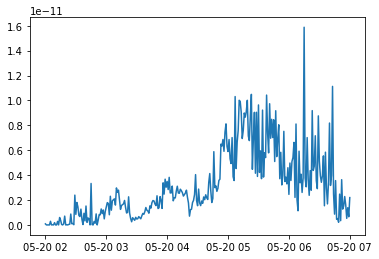

In [29]:
plt.plot(times,var_output)
plt.show()

In [30]:
var_output.shape

(301,)

In [31]:
np.savetxt(output_source+'Flash_Energy_SUM.txt',var_output)